In [80]:
#Retail & E-Commerce

# Instacart Market Basket Analysis
# Kaggle

#data
#https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis/data

#class data doc
#https://docs.google.com/document/d/1BsJIWU4TKUkADvnNEC14b8coQ5VqslJtS7ZBCYJVZAk/edit?tab=t.ta49d25hofw5#heading=h.bbadcysas44j

Class: DX699 02 - AI for Leaders<br>
Author: Carlos Jaime<br>
Date: 02/17/2024
<hr>

# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [ ]:
'''
Who: Data scientists/analysis and retail decisioin makers
What: Patterns in customrder timing and product ordering/reordering behavior
How: Using statistical measures and charts to highlight insights of customer behavior with products
'''

'\nwho: business leaders wanting to sell products before expire or easons?\nwhat: we want to sell more of x product\nhow: ill show what products or areas could be better\n'

# 3. Homework - work with your own data

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

<hr>


#### Load Data & Libs

In [16]:
#!pip install pandas
#!pip install pyarrow


In [ ]:
import os
import glob
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:


base = "../data/Retail_and_ECommerce/Instacart_Market_Basket_A"




# #basic file handling
# aisles = pd.read_csv(os.path.join(base, "aisles.csv"))
# departments = pd.read_csv(os.path.join(base, "departments.csv"))
# products = pd.read_csv(os.path.join(base, "products.csv"))
# order_products_train = pd.read_csv(os.path.join(base, "order_products__train.csv"))



# #combine brken files i had split them into files that could be individual uploaded to github because they ahve a limit per file

# # orders 
# orders_files = glob.glob(os.path.join(base, "orders_part_*.csv"))
# orders = pd.concat([pd.read_csv(f) for f in orders_files], ignore_index=True)

# # prior 
# prior_files = glob.glob(os.path.join(base, "order_products__prior_*.csv"))
# order_products_prior = pd.concat([pd.read_csv(f) for f in prior_files], ignore_index=True)




# # print results
# print("Loaded everything.")
# print("orders shape:", orders.shape)
# print("order_products_prior shape:", order_products_prior.shape)


##### Merge the data

In [19]:
# # Combine prior and train if you want full dataset
# order_products = pd.concat(
#     [order_products_prior, order_products_train],
#     axis=0
# )

# # Merge with orders
# df = order_products.merge(orders, on="order_id", how="left")

# # Merge with products
# df = df.merge(products, on="product_id", how="left")

# # Merge with aisles
# df = df.merge(aisles, on="aisle_id", how="left")

# # Merge with departments
# df = df.merge(departments, on="department_id", how="left")

# df.head()

#### Save merged dataset

In [20]:
#out_path = os.path.join(base, "instacart_merged.parquet")
#df.to_parquet(out_path, index=False)

In [ ]:
out_path = os.path.join(base, "instacart_merged.parquet")
df = pd.read_parquet(out_path)



#create a seperate orders dataset for the graph later
orders = df[[
    "order_id","user_id","eval_set","order_number","order_dow",
    "order_hour_of_day","days_since_prior_order"
]].drop_duplicates("order_id")


#### Begin EDA

In [59]:
df.sample(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
19367798,2193411,28986,10,0,78870,prior,35,6,10,21.0,Mild Italian Chicken Sausage,106,12,hot dogs bacon sausage,meat seafood
8733922,492911,27573,11,1,19518,prior,9,0,10,6.0,Sweet Potato Littles,129,1,frozen appetizers sides,frozen
21473226,2415228,4302,6,0,60172,prior,31,2,15,15.0,Artichoke Hearts,116,1,frozen produce,frozen
22599740,2105399,37107,4,0,144985,prior,7,5,18,6.0,Ground Cumin,104,13,spices seasonings,pantry
29723157,1714528,2024,11,0,78995,prior,5,1,12,12.0,Organic Diced Tomatoes Fire Roasted with Mediu...,81,15,canned jarred vegetables,canned goods


In [29]:
#Summarize the datasets using info() and describe()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07,3.381911e+07,3.381911e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01,7.121799e+01,9.918544e+00
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00,3.819898e+01,6.281655e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,4.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,9.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.600000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,2.100000e+01


In [ ]:
#Are there any duplicate rows?
#No exact duplicate rows were found in the merged dataset

dup_rows = df.duplicated().sum()
dup_rows # no duplicate rows

np.int64(0)

In [ ]:
#Are there any duplicate values in a given column (when this would be inappropriate?)
#While order_id appears multiple times, this is expected bc each order contains multiple products (one row per order-product pair)

dup_order_product = df.duplicated(subset=["order_id","product_id"]).sum()
dup_order_product #no duplicate values

np.int64(0)

In [79]:
#What are the mean, median, and mode of each column?
#I id not do this on df, because df is order product level, not order level

order_means = orders.mean(numeric_only=True)
order_medians = orders.median(numeric_only=True)
order_modes = orders.mode(numeric_only=True).iloc[0]

order_means, order_medians, order_modes

(order_id                  1.710542e+06
 user_id                   1.029782e+05
 order_number              1.715486e+01
 order_dow                 2.776219e+00
 order_hour_of_day         1.345202e+01
 days_since_prior_order    1.111484e+01
 dtype: float64,
 order_id                  1710542.0
 user_id                    102689.0
 order_number                   11.0
 order_dow                       3.0
 order_hour_of_day              13.0
 days_since_prior_order          7.0
 dtype: float64,
 order_id                    1.0
 user_id                   210.0
 order_number                1.0
 order_dow                   0.0
 order_hour_of_day          10.0
 days_since_prior_order     30.0
 Name: 0, dtype: float64)

In [ ]:
#Are there any missing or null values?
####Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?
#Missing values are only found for days_since_prior_order, this is correct, because missing would point towards a first order and not data issues

missing = df.isnull().sum().sort_values(ascending=False)
missing


days_since_prior_order    2078068
order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [ ]:
#Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
#All time realted features fall within reasonable ranges

sanity_check = {
    "order_hour_of_day": (orders["order_hour_of_day"].min(), orders["order_hour_of_day"].max()),
    "order_dow": (orders["order_dow"].min(), orders["order_dow"].max()),
    "days_since_prior_order_min": orders["days_since_prior_order"].min(),
}
sanity_check


{'order_hour_of_day': (np.int64(0), np.int64(23)),
 'order_dow': (np.int64(0), np.int64(6)),
 'days_since_prior_order_min': np.float64(0.0)}

In [ ]:
#Encode any categorical variables (e.g. with one-hot encoding.)

#Cat features were kept for this analysis (EDA), but in the future, encoded would be used
#EX: pd.get_dummies()




# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [35]:
# top_products = df["product_name"].value_counts().head(15)

# top_products.plot(kind="barh", figsize=(8,6))
# plt.gca().invert_yaxis()
# plt.title("Top 15 Most Purchased Products")
# plt.xlabel("Purchase Count")
# plt.show()

In [36]:
# reorder_dept = (
#     df.groupby("department")["reordered"]
#       .mean()
#       .sort_values(ascending=False)
# )

# reorder_dept.plot(kind="bar", figsize=(10,5))
# plt.title("Average Reorder Rate by Department")
# plt.ylabel("Reorder Rate")
# plt.xticks(rotation=45)
# plt.show()

In [37]:
# orders_per_user = orders.groupby("user_id").size()

# orders_per_user.hist(bins=50)
# plt.title("Distribution of Orders per User")
# plt.xlabel("Number of Orders")
# plt.ylabel("Number of Users")
# plt.show()


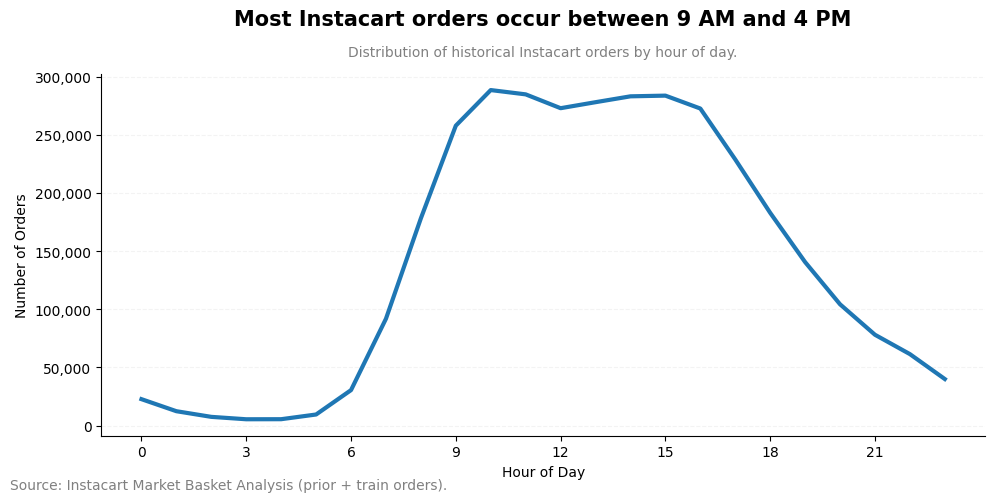

In [ ]:

#Storytelling with data book, page 4 line graph



hourly = orders.groupby("order_hour_of_day").size().sort_index()

# genreal setup
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(hourly.index, hourly.values, linewidth=3)



# the main title information
ax.set_title(
    "Most Instacart orders occur between 9 AM and 4 PM",
    fontsize=15,
    fontweight="bold",
    pad=35 #spacing between that title and the graph
)

# little grey sub title information
ax.text(
    0.5, 1.05,
    "Distribution of historical Instacart orders by hour of day.",
    transform=ax.transAxes,
    ha="center",
    fontsize=10,
    color="gray"
)

# set ticks and adjust x and y information
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Orders")

ax.set_xticks(range(0,24,3))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis="y", linestyle="--", alpha=0.15) #i tried to make the light but maybe removing them would be better?

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



# grey foot note like the book
fig.text(
    0.01, 0.01,
    "Source: Instacart Market Basket Analysis (prior + train orders).",
    ha="left",
    fontsize=10,
    color="gray"
)

plt.tight_layout()
plt.show()
